In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [4]:
df_all_years = pd.read_csv(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 3\ML capital bikeshare\df_all_year.csv")

In [5]:
df_all_years.columns

Index(['started_at', 'ended_at', 'duration', 'day_sort', 'start_station_id',
       'end_station_id', 'season', 'temperature', 'weather_condition',
       'customer_type', 'bike_type', 'start_lat', 'start_lng', 'end_lat',
       'end_lng', 'start_ward', 'end_ward'],
      dtype='object')

### Split Data

In [6]:
df_all_years['started_at'] = pd.to_datetime(df_all_years['started_at'])

bank_holiday = ['2023-01-02', '2023-01-16', '2023-02-20', '2023-05-29', '2023-06-19', '2023-07-04', '2023-09-04', '2023-10-09', '2023-11-10', '2023-11-23', '2023-12-25']  
school_holidays = [('2023-02-18', '2023-02-24'), ('2023-03-15', '2023-03-21'), ('2023-07-01', '2023-08-27'),('2023-11-22', '2023-11-26'), ('2023-12-22', '2023-12-31')]

df_all_years['day_type'] = 'regular'

bank_holiday_dates = pd.to_datetime(bank_holiday).date  
df_all_years.loc[df_all_years['started_at'].dt.date.isin(bank_holiday_dates), 'day_type'] = 'bank_holiday'

for start, end in school_holidays:
    df_all_years.loc[df_all_years['started_at'].dt.date.between(pd.to_datetime(start).date(), pd.to_datetime(end).date()), 'day_type'] = 'school_holidays'

In [7]:
df_all_years['started_at'] = pd.to_datetime(df_all_years['started_at'])


df_2021 = df_all_years[df_all_years['started_at'].dt.year == 2021]

df_2022 = df_all_years[df_all_years['started_at'].dt.year == 2022]

df_2023 = df_all_years[df_all_years['started_at'].dt.year == 2023]

In [8]:
df_2023.head()

,started_at,ended_at,duration,day_sort,start_station_id,end_station_id,season,temperature,weather_condition,customer_type,bike_type,start_lat,start_lng,end_lat,end_lng,start_ward,end_ward,day_type
4948498,2023-01-01 00:03:48,2023-01-01 00:41:23,2255.0,weekend,31258.0,31204.0,winter,8.4,cloudy,member,classic_bike,38.888255,-77.049436,38.896300,-77.045000,Ward 2,Ward 2,regular
4948499,2023-01-01 00:05:08,2023-01-01 00:16:09,661.0,weekend,31119.0,31122.0,winter,8.4,cloudy,member,electric_bike,38.921118,-77.031776,38.928893,-77.036250,Ward 1,Ward 1,regular
4948500,2023-01-01 00:07:13,2023-01-01 00:16:43,570.0,weekend,31245.0,31278.0,winter,8.4,cloudy,member,classic_bike,38.912719,-77.022155,38.912648,-77.041834,Ward 2,Ward 2,regular
4948501,2023-01-01 00:07:28,2023-01-01 01:04:38,3430.0,weekend,31248.0,31297.0,winter,8.4,cloudy,casual,classic_bike,38.888774,-77.028694,38.898460,-77.053052,Ward 2,Ward 2,regular
4948502,2023-01-01 00:08:09,2023-01-01 00:14:28,379.0,weekend,31126.0,31107.0,winter,8.4,cloudy,member,classic_bike,38.925636,-77.027112,38.931900,-77.038800,Ward 1,Ward 1,regular


In [9]:
df_2023.dtypes

started_at           datetime64[ns]
ended_at                     object
duration                    float64
day_sort                     object
start_station_id            float64
end_station_id              float64
season                       object
temperature                 float64
weather_condition            object
customer_type                object
bike_type                    object
start_lat                   float64
start_lng                   float64
end_lat                     float64
end_lng                     float64
start_ward                   object
end_ward                     object
day_type                     object
dtype: object

In [10]:
# Check for NaN values in the entire DataFrame
nan_summary = df_2023.isna().sum()

# Print columns with NaN values
print("Columns with NaN values:")
print(nan_summary[nan_summary > 0])

# Optional: print a summary of NaN counts across all columns
print("\nTotal NaN values in the dataset:", df_2023.isna().sum().sum())


Columns with NaN values:
Series([], dtype: int64)

Total NaN values in the dataset: 0


### Machine Learning

In [11]:
# Ensure 'started_at' is a datetime column
df_2023['started_at'] = pd.to_datetime(df_2023['started_at'])

# Extract hour from the 'started_at' column
df_2023['hour'] = df_2023['started_at'].dt.hour

# Encode 'day_type' as 0 for weekday, 1 for weekend
df_2023['day_type'] = df_2023['day_type'].apply(lambda x: 1 if x == 'weekend' else 0)

# Filter the data to include only rides starting in Ward 7 or Ward 8
ward_7_and_8 = df_2023[df_2023['start_ward'].isin(['Ward 7', 'Ward 8'])]

# Group by hour, temperature, and day_type, and count the number of rides in each group
ride_counts = ward_7_and_8.groupby(['hour', 'temperature', 'day_type']).size().reset_index(name='ride_count')

# Show the first few rows of the prepared data
print(ride_counts.head())

C:\Users\janin\AppData\Local\Temp\ipykernel_10944\1116722445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['started_at'] = pd.to_datetime(df_2023['started_at'])
C:\Users\janin\AppData\Local\Temp\ipykernel_10944\1116722445.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['hour'] = df_2023['started_at'].dt.hour


   hour  temperature  day_type  ride_count
0     0        -12.5         0           2
1     0        -11.9         0           3
2     0        -11.5         0           3
3     0        -10.6         0           1
4     0         -9.6         0           1


C:\Users\janin\AppData\Local\Temp\ipykernel_10944\1116722445.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['day_type'] = df_2023['day_type'].apply(lambda x: 1 if x == 'weekend' else 0)


Mean Squared Error: 229.2387725399582
R-squared score: 0.4112063128881297


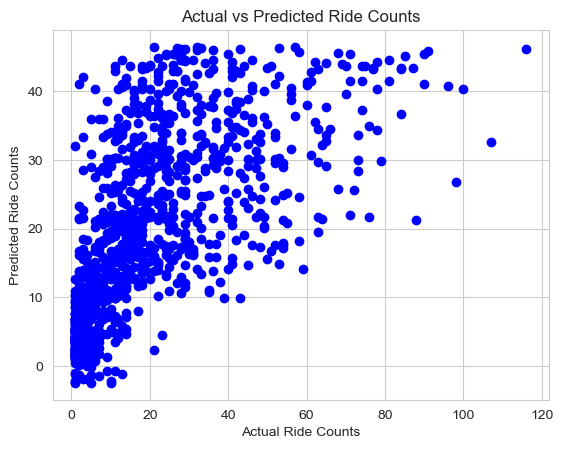

In [12]:
# Select the features and target
X = ride_counts[['hour', 'temperature', 'day_type']]
y = ride_counts['ride_count']

# Initialize PolynomialFeatures with degree 2 (you can experiment with higher degrees)
poly = PolynomialFeatures(degree=4)

# Transform the features into polynomial features
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print R-squared score (Goodness of fit)
r2_score = model.score(X_test, y_test)
print(f"R-squared score: {r2_score}")

# Optional: Plot actual vs predicted

sns.set_style("whitegrid")
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Ride Counts')
plt.ylabel('Predicted Ride Counts')
plt.title('Actual vs Predicted Ride Counts')
plt.show()


In [13]:
# Example input: hour=10, temperature=15, day_type=1 (weekend)
input_data = np.array([[10, 15, 1]])

# Transform the input data into polynomial features
input_data_poly = poly.transform(input_data)

# Make a prediction
predicted_rides = model.predict(input_data_poly)
print(f"Predicted number of rides: {predicted_rides[0]}")

Predicted number of rides: 27.080349507054233


c:\Users\janin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [14]:
X

,hour,temperature,day_type
0,0,-12.5,0
1,0,-11.9,0
2,0,-11.5,0
3,0,-10.6,0
4,0,-9.6,0
...,...,...,...
5292,23,29.9,0
5293,23,30.0,0
5294,23,30.5,0
5295,23,31.2,0


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Standardize the features
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X[['hour', 'temperature', 'day_type']])


X_scaled = X

# Apply PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_scaled)

# Log-transform the target variable to handle skewness
y_log = np.log1p(y)  # Log transformation of ride_count

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_log, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model /// I need to fit to x_poly
model.fit(X_train, y_train)

# Predict the test set
y_pred_log = model.predict(X_test)

# Inverse transform the predictions (log to original scale)
y_pred = np.expm1(y_pred_log)

# Calculate the Mean Squared Error
mse = mean_squared_error(np.expm1(y_test), y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f'R^2 Score: {r2}')

# Plot actual vs predicted
sns.set_style("whitegrid")
plt.scatter(np.expm1(y_test), y_pred, color='blue', alpha=0.6)  # Change color here
plt.plot([np.expm1(y_test).min(), np.expm1(y_test).max()], [np.expm1(y_test).min(), np.expm1(y_test).max()], color='red', linestyle='--', label="Ideal Line")
plt.xlabel('Actual Ride Counts')
plt.ylabel('Predicted Ride Counts')
plt.title('Actual vs Predicted Ride Counts')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
plt.legend()
plt.show()


TypeError: 'numpy.float64' object is not callable

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Log-transform the target variable to handle skewness
y_log = np.log1p(y)  # Log transformation of ride_count

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_log, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['hour', 'temperature', 'day_type']])

# Apply PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_scaled)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model /// I need to fit to x_poly
model.fit(X_poly, y_train)

# Predict the test set
y_pred_log = model.predict(X_test)

# Inverse transform the predictions (log to original scale)
y_pred = np.expm1(y_pred_log)

# Calculate the Mean Squared Error
mse = mean_squared_error(np.expm1(y_test), y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted
sns.set_style("whitegrid")
plt.scatter(np.expm1(y_test), y_pred, color='blue', alpha=0.6)  # Change color here
plt.plot([np.expm1(y_test).min(), np.expm1(y_test).max()], [np.expm1(y_test).min(), np.expm1(y_test).max()], color='red', linestyle='--', label="Ideal Line")
plt.xlabel('Actual Ride Counts')
plt.ylabel('Predicted Ride Counts')
plt.title('Actual vs Predicted Ride Counts')
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')
plt.legend()
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [5297, 4237]

Mean Squared Error: 250.18648284209254


c:\Users\janin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


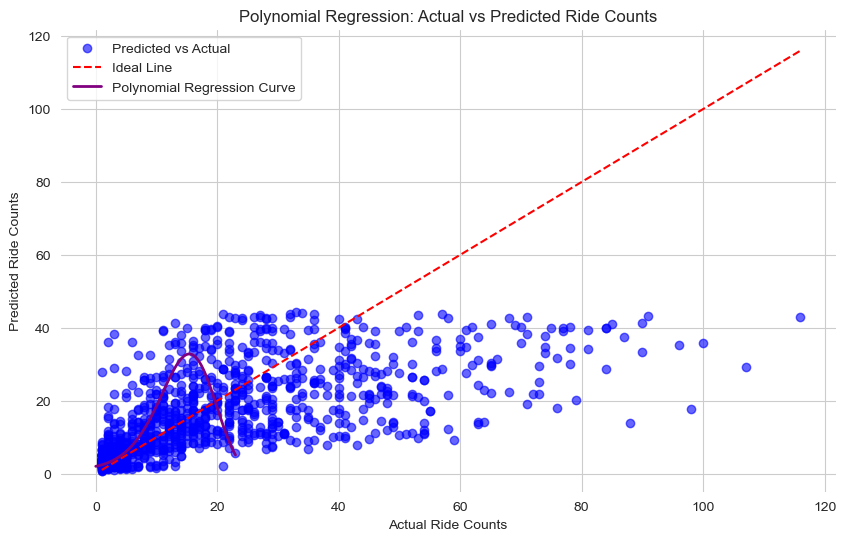

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and y are the features and target variable
# Let's assume X and y are your original feature matrix and target vector

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['hour', 'temperature', 'day_type']])

# Apply PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_scaled)

# Log-transform the target variable to handle skewness
y_log = np.log1p(y)  # Log transformation of ride_count

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_log, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the test set
y_pred_log = model.predict(X_test)

# Inverse transform the predictions (log to original scale)
y_pred = np.expm1(y_pred_log)

# Calculate the Mean Squared Error
mse = mean_squared_error(np.expm1(y_test), y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted
sns.set_style("whitegrid")

# Plot actual vs predicted values as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(np.expm1(y_test), y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Plot the ideal line (where actual = predicted)
plt.plot([np.expm1(y_test).min(), np.expm1(y_test).max()],
         [np.expm1(y_test).min(), np.expm1(y_test).max()],
         color='red', linestyle='--', label="Ideal Line")

# Now plotting the polynomial regression curve
# Generate a range of values for hour to plot the curve
hour_range = np.linspace(X['hour'].min(), X['hour'].max(), 100).reshape(-1, 1)

# Create a synthetic input matrix with hour_range, using constant values for temperature and day_type
# Use the mean of temperature and day_type from the training data as placeholders
mean_temp = X['temperature'].mean()
mean_day_type = X['day_type'].mean()

# Combine hour_range with the constant values of temperature and day_type
hour_range_combined = np.column_stack([hour_range, np.full_like(hour_range, mean_temp), np.full_like(hour_range, mean_day_type)])

# Standardize this combined input (matching the transformation done on training data)
hour_range_scaled = scaler.transform(hour_range_combined)

# Transform the scaled input into polynomial features
hour_range_poly = poly.transform(hour_range_scaled)

# Predict the values using the trained model
y_poly_pred_log = model.predict(hour_range_poly)
y_poly_pred = np.expm1(y_poly_pred_log)  # Inverse the log transformation

# Plot the polynomial regression curve
plt.plot(hour_range, y_poly_pred, color='purple', linewidth=2, label='Polynomial Regression Curve')

# Labeling the plot
plt.xlabel('Actual Ride Counts')
plt.ylabel('Predicted Ride Counts')
plt.title('Polynomial Regression: Actual vs Predicted Ride Counts')

# Hide the outer border lines for a cleaner look
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')

# Show the legend
plt.legend()

# Show the plot
plt.show()


Mean Squared Error: 250.18648284209254


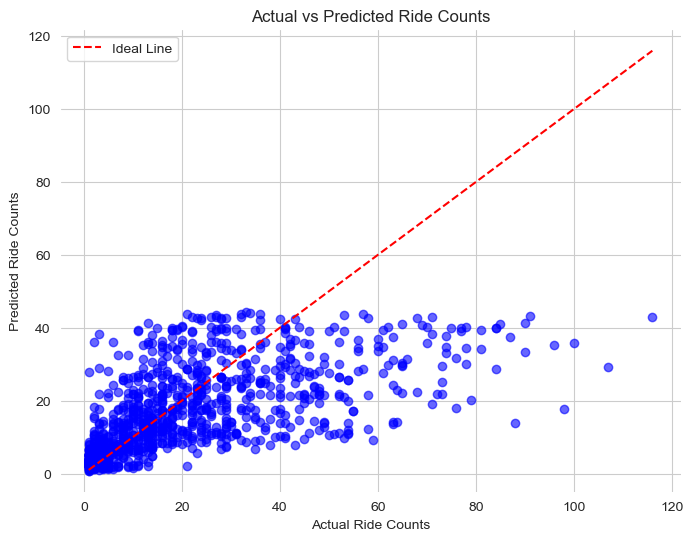

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X and y are the features and target variable

# Step 1: Standardize the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['hour', 'temperature', 'day_type']])  # Standardize the features

# Step 2: Apply PolynomialFeatures
poly = PolynomialFeatures(degree=3)  # Degree 3 for polynomial terms
X_poly = poly.fit_transform(X_scaled)  # Transform features into polynomial features

# Step 3: Log-transform the target variable to handle skewness
y_log = np.log1p(y)  # Log transformation of ride_count to reduce skewness

# Step 4: Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_log, test_size=0.2, random_state=42)

# Step 5: Initialize the Linear Regression Model
model = LinearRegression()

# Step 6: Fit the Model on Training Data
model.fit(X_train, y_train)

# Step 7: Make Predictions on Test Data
y_pred_log = model.predict(X_test)  # Predict in the log scale

# Step 8: Inverse the Log Transformation on Predictions
y_pred = np.expm1(y_pred_log)  # Inverse of log transformation to get the original scale

# Step 9: Calculate the Mean Squared Error
mse = mean_squared_error(np.expm1(y_test), y_pred)  # Compare the actual vs predicted
print(f"Mean Squared Error: {mse}")

# Step 10: Plot Actual vs Predicted
sns.set_style("whitegrid")

# Plot the scatter plot for actual vs predicted ride counts
plt.figure(figsize=(8, 6))
plt.scatter(np.expm1(y_test), y_pred, color='blue', alpha=0.6)  # Scatter plot

# Ideal line (where actual = predicted)
plt.plot([np.expm1(y_test).min(), np.expm1(y_test).max()],
         [np.expm1(y_test).min(), np.expm1(y_test).max()],
         color='red', linestyle='--', label="Ideal Line")

# Labeling the plot
plt.xlabel('Actual Ride Counts')
plt.ylabel('Predicted Ride Counts')
plt.title('Actual vs Predicted Ride Counts')

# Hide the outer border lines for a cleaner look
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['bottom'].set_color('none')

# Show the legend
plt.legend()

# Show the plot
plt.show()
